Numerical columns: ['visibility']
Categorical columns: ['weather_conditions', 'road_surface_condition', 'traffic_congestion']


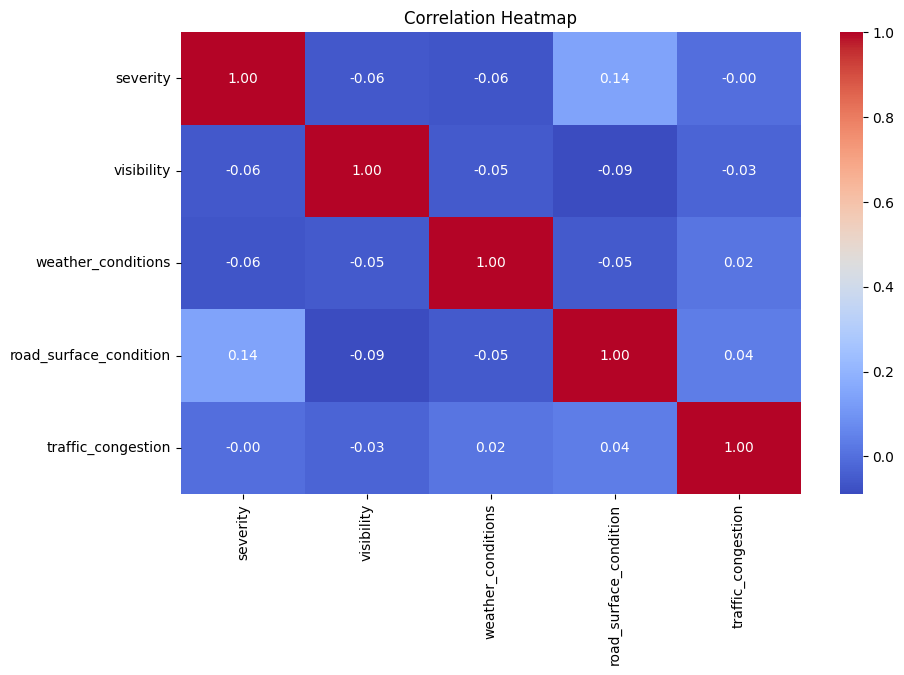

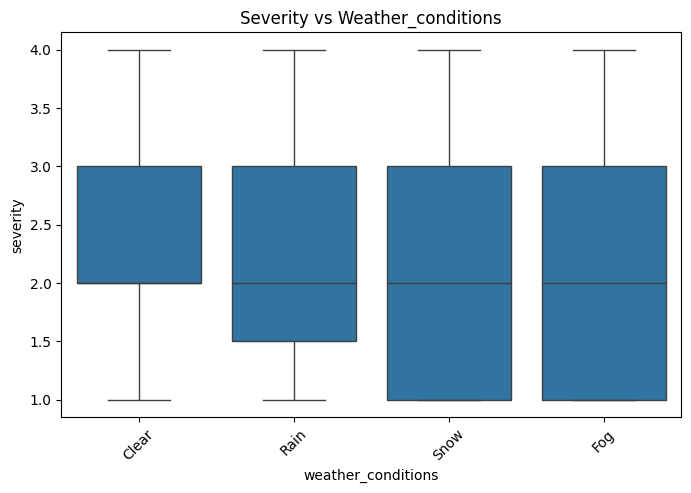

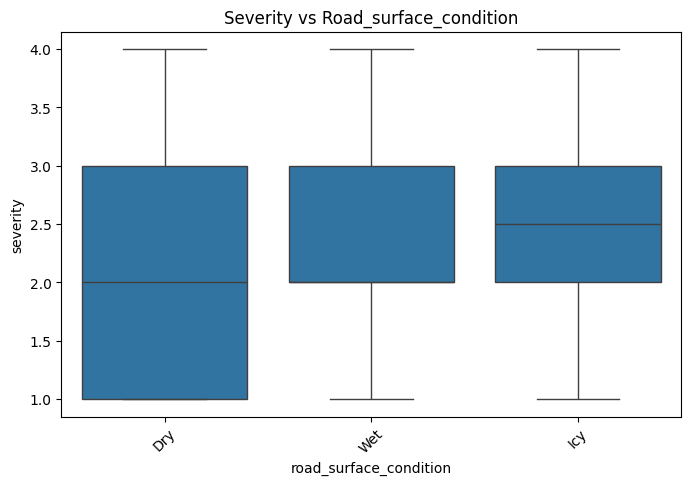

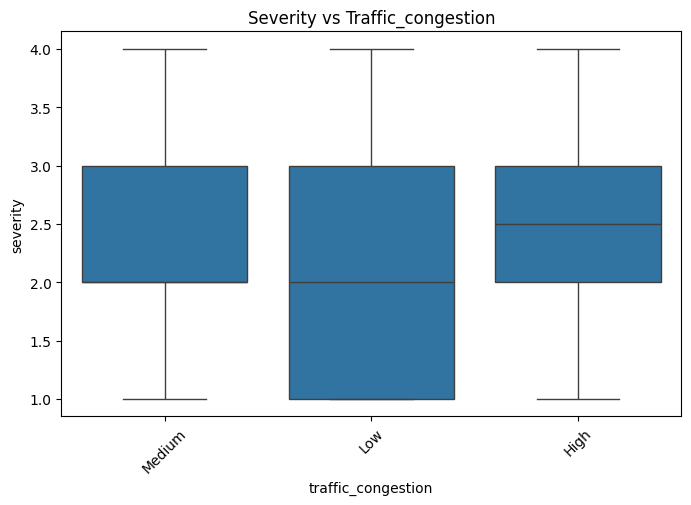

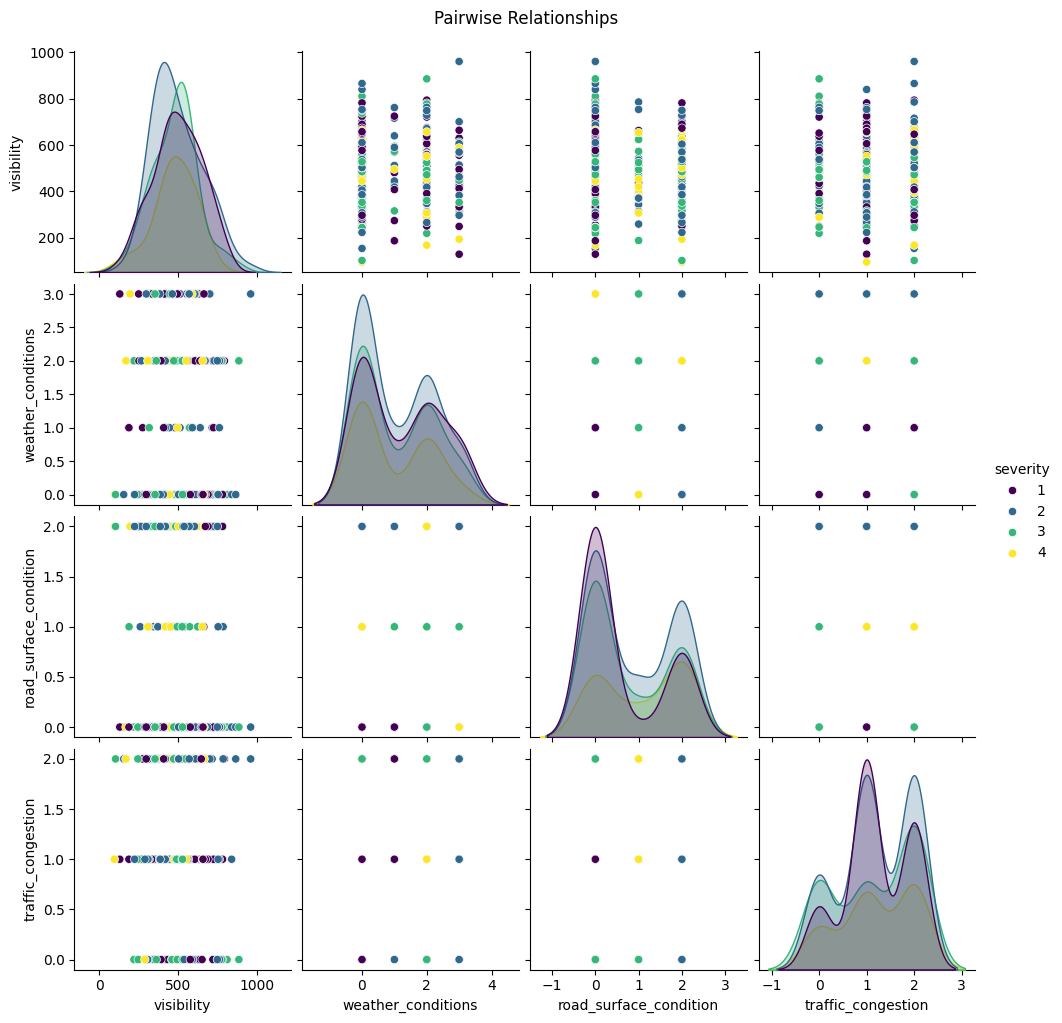

In [3]:
# ------------------- Multivariate Analysis with Sample Dataset -------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ------------------- Create Synthetic Dataset -------------------
np.random.seed(42)  # reproducibility

n = 300  # number of rows

data = {
    "severity": np.random.choice([1, 2, 3, 4], size=n, p=[0.25, 0.35, 0.25, 0.15]),
    "weather_conditions": np.random.choice(["Clear", "Rain", "Fog", "Snow"], size=n, p=[0.5, 0.3, 0.1, 0.1]),
    "visibility": np.random.normal(loc=500, scale=150, size=n).astype(int),  # meters
    "road_surface_condition": np.random.choice(["Dry", "Wet", "Icy"], size=n, p=[0.6, 0.3, 0.1]),
    "traffic_congestion": np.random.choice(["Low", "Medium", "High"], size=n, p=[0.4, 0.4, 0.2]),
}

df = pd.DataFrame(data)

# ------------------- Identify column types -------------------
target = 'severity'
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target in num_cols:
    num_cols.remove(target)

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

# ------------------- Correlation Heatmap -------------------
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

corr_matrix = df_encoded[[target] + num_cols + cat_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# ------------------- Boxplots -------------------
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y=target, data=df)
    plt.title(f'{target.capitalize()} vs {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

# ------------------- Pair Plot -------------------
df_pair = df_encoded[[target] + num_cols + cat_cols]

sns.pairplot(df_pair, hue=target, palette='viridis')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# ------------------- End of Multivariate Analysis -------------------